# Wrangling Doggos

This is a Data Wrangling effort, meant to explore all the wonderful doggos on WeRateDoggos, using the power of data wrangling and data analysis.

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import os
from datetime import datetime
import matplotlib.pyplot as plt

## Gather

##### There are 3 files which are going to be used for this project:
- The only file on hand, which is the WeRateDogs Twitter archive
- The tweet image predictions, which will be downloaded programmatically from the available URL
- The file containing updated information about all of the tweets included in the archive, namely retweed count and favorite_count


Since I am already in the possession of the first file, the first step is obtaining the image predictions

In [10]:
# downloading the image predictions with the requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# writing the file into the same folder as all other materials
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)


The next step is getting the updated information about the tweets contained in the archive. With the aid of the twitter archive, every tweet id will be queried using an API provided by the tweepy library. All of the resulting outputs will be stored into a txt file.


In [35]:
# geeting all relevant data from all tweets into one txt file
# this is done taking into account twitter's rate limit that control traffic for a server
# a try-except block was used to account for tweets that have  been deleted

consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

with open('data.txt', 'w') as outfile:
    for id in archive['tweet_id']:
        try:
            tweet = api.get_status(id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            outfile.write(json.dumps(tweet._json))
            outfile.write('\n')
        except tweepy.TweepError:
            continue

Rate limit reached. Sleeping for: 144
Rate limit reached. Sleeping for: 539


## Assess

The next step is assessing the data that I already have. I will do so either visually, by looking at the data, and programmatically by making use of the many functions available in python.

In [57]:
# loading the first file into a data frame, and visualising it

archive = pd.read_csv('twitter-archive-enhanced.csv')

archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [35]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
archive[archive['rating_denominator'] != 10].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [31]:
archive[np.isnan(archive['in_reply_to_status_id']) != True].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692142790...,13,10,None,None,None,None,None


In [48]:
archive[np.isnan(archive['retweeted_status_id']) != True].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
420,822163064745328640,NaN,NaN,2017-01-19 19:25:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Mattie. She's extremely...,7.862340e+17,4.196984e+09,2016-10-12 15:55:59 +0000,https://twitter.com/dog_rates/status/786233965...,11,10,Mattie,None,None,None,None
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None


In [25]:
for urls in archive['expanded_urls'].str.split(','):
    try:
        if (len(set(urls))) ==2:
            print(urls)
    except TypeError:
        continue

['https://gofundme.com/ydvmve-surgery-for-jax', 'https://twitter.com/dog_rates/status/890971913173991426/photo/1']
['https://www.gofundme.com/mingusneedsus', 'https://twitter.com/dog_rates/status/886736880519319552/photo/1', 'https://twitter.com/dog_rates/status/886736880519319552/photo/1']
['https://www.gofundme.com/3yd6y1c', 'https://twitter.com/dog_rates/status/878281511006478336/photo/1']
['https://www.gofundme.com/3yd6y1c', 'https://twitter.com/dog_rates/status/878281511006478336/photo/1']
['https://www.gofundme.com/help-my-baby-sierra-get-better', 'https://twitter.com/dog_rates/status/873213775632977920/photo/1', 'https://twitter.com/dog_rates/status/873213775632977920/photo/1']
['https://www.gofundme.com/help-my-baby-sierra-get-better', 'https://twitter.com/dog_rates/status/873213775632977920/photo/1', 'https://twitter.com/dog_rates/status/873213775632977920/photo/1']
['https://www.gofundme.com/help-fix-codys-torn-acl', 'https://twitter.com/dog_rates/status/870656317836468226/ph

In [3]:
predictions = pd.read_csv('image-predictions.tsv', sep='\t')
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [5]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [6]:
predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

Bellow I will check if the same naming convention applies across all 3 pX columns in the predictions table.

In [11]:
p1_dogs = list(predictions[predictions['p1_dog']==1]['p1'])
p2_dogs = list(predictions[predictions['p2_dog']==1]['p2'])
p3_dogs = list(predictions[predictions['p3_dog']==1]['p3'])
p1_dogs = list(set(p1_dogs))
p2_dogs = list(set(p2_dogs))
p3_dogs = list(set(p3_dogs))
all_dogs = set(p1_dogs + p2_dogs + p3_dogs)

all_dogs_lower = [dog.lower() for dog in all_dogs]
len(set(all_dogs_lower)) != len(all_dogs)

False

As an additional step, I will read the data.txt file and create a data frame based on it. This file contains fewer tweets that the archive because some of them have been deleted.

In [4]:
data_dict = {'id_str': [],
            'favorite_count': [],
            'retweet_count': []}
with open('data.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        for key in data_dict.keys():
            data_dict[key].append(tweet[key])
data_tweets = pd.DataFrame.from_dict(data_dict)
data_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
favorite_count    2347 non-null int64
id_str            2347 non-null object
retweet_count     2347 non-null int64
dtypes: int64(2), object(1)
memory usage: 45.9+ KB


#### Quality

- Erroneous data types:
    - tweet_id columns is int, it should be string (valid for both the enhanced archive and the image predictions)
    - timestamp is string but it should be datetime
    - the last 4 columns should be of type int, making it easier to aggregate later on
- Invalid data: some rows are not original tweets, but rather replies or retweets
- Invalid data in the name column
- Invalid data in the dog stages column. Not all dog stages have been infered correctly
- Invalid and/or innacurate data in rating_X columns
- Some rows are invalid, they come from deleted tweets
- Missing columns retweet_count and favorite_count
- Invalid data for expanded_urls, only the url that leads to the picture should be displayed



#### Tidiness

- Column names do not match in all tables, for example timestamp should be created_at
- 2 variables in 1 column, has_name and name (some dogs' name cannot be infered from the text, which is why another column is needed to account for them)
- The same as above for dog stages and dog grade (the final rating column is missing)
- Redundant columns in the archive table, since we do not care about replies, in_reply_X and retweeted_X columns are not needed

## Clean

A first step is to copy the 3 data frames into the data frames that will be used for the cleaning process.

In [64]:
clean_archive = archive.copy()
clean_predictions = predictions.copy()

##### Define

Change some columns' data types in the following way:
- set tweet_id to str (in both occuring tables)
- set timestamp to datetime
- set the columns for dog stages to int, which can be broken down into 3 steps:
    1. Set all entries that are not 'None' to '1'
    2. Set all 'None' entries to '0'
    3. Change the data type to int

##### Code

In [65]:
# changing the type of the tweet_id column to string
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)
clean_predictions['tweet_id'] = clean_predictions['tweet_id'].astype(str)

# changing the type of the timestamp column to datetime
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

# setting the type of the last 4 columns to int
# creating and applying a function to change the value of the entries
def change_type_dogstage(x):
    if x != 'None':
        return '1'
    else:
        return '0'
for column in clean_archive.columns[-4:]:
    clean_archive[column] = clean_archive[column].apply(lambda x: change_type_dogstage(x))
    # finally changing the type of the last 4 columns
    clean_archive[column] = clean_archive[column].astype(np.int64)

##### Test

In [10]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null int64
floofer                       2356 non-null int64
pupper                        2356 non-null int64
puppo                         2356 non-null int64
dtypes: datetime64[ns](1), 

In [11]:
clean_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,0,0,0,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,0,0,0,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,0,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1,0,0,0


In [12]:
clean_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


##### Define

Drop the tweets that are replies or retweets. These rows can be distinguised by having a value in either in_reply_X or retweeted_x.This is to be done in 3 steps:
1. Saving the index of the rows who are either retweets or replies as a pandas series
2. Merging the 2 series
3. Dropping the actual rows


##### Code

In [13]:
# finding the rows that are either replies or retweets and saving their indexes to pandas series
index_replies = pd.Series(clean_archive[np.isnan(clean_archive['in_reply_to_status_id']) != True].index)
index_retweets = pd.Series(clean_archive[np.isnan(clean_archive['retweeted_status_id']) != True].index)

# merging the two series
merged_indexes = pd.concat([index_replies,index_retweets])

# dropping the rows and reseting the index
clean_archive.drop(merged_indexes, inplace=True)
clean_archive.reset_index(drop=True, inplace=True)

##### Test

In [14]:
clean_archive[(np.isnan(clean_archive['in_reply_to_status_id']) != True) | (np.isnan(clean_archive['retweeted_status_id']) != True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define
Drop the columns that are no longer necessary, in_reply_X and retweeted_status_X

##### Code

In [15]:
col_to_drop = []
for column in clean_archive.columns:
    if 'in_reply' in column:
        col_to_drop.append(column)
    elif 'retweeted_s' in column:
        col_to_drop.append(column)
clean_archive.drop(col_to_drop, axis=1, inplace=True)

##### Test

In [16]:
clean_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### Define

Change the names of the following column names(in all tables in which they appear) so that all tables can be joined into one table:
- tweet_id to id_str
- timestamp to created_at
- text to full_text
- expanded_urls to expanded_url

##### Code

In [17]:
clean_archive.rename(columns = {'tweet_id': 'id_str',
            'timestamp': 'created_at',
            'text': 'full_text',
            'expanded_urls': 'expanded_url'}, inplace=True)

clean_predictions.rename(columns = {'tweet_id': 'id_str'}, inplace=True)

##### Test

In [18]:
clean_archive.columns

Index(['id_str', 'created_at', 'source', 'full_text', 'expanded_url',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [19]:
clean_predictions.columns

Index(['id_str', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

##### Define

The following 2 issues can be solved at the same time:
- Having each type of observation in one table(in this case, only one table)
- Removing deleted tweets or tweets without images

They can be solved by performing an inner join on the 3 data frames in the following sequence:
1. Merging clean_archive with data_tweets on id_str
2. Merging the resulting data frame from step 1 with clean_predictions on id_str

##### Code

In [20]:
twitter_archive_master = clean_archive.merge(data_tweets) #automatically merge on the intersection of the columns
twitter_archive_master= twitter_archive_master.merge(clean_predictions)

##### Test

In [21]:
twitter_archive_master.columns

Index(['id_str', 'created_at', 'source', 'full_text', 'expanded_url',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [22]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
id_str                1971 non-null object
created_at            1971 non-null datetime64[ns]
source                1971 non-null object
full_text             1971 non-null object
expanded_url          1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null int64
floofer               1971 non-null int64
pupper                1971 non-null int64
puppo                 1971 non-null int64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null

##### Define

Change the values in the expanded_urls column to include only valid data, by using a function. This means only the url for the photo, nothing else. The url that contains the photo has 'photo/1' in it, which is how I will select the valid information.

##### Code

In [23]:
# defining the function to perform the changes
def change_url(x):
    list_of_urls = x.split(',')
    for el in list(set(list_of_urls)):
        if 'photo/1' in el:
            return el

# applying the changes to the column
twitter_archive_master['expanded_url'] = twitter_archive_master['expanded_url'].apply(lambda x: change_url(x))

##### Test

In [24]:
# initializing the count of invalid entries to 0
invalid_strings = 0 

# checking all entries in the column by splitting any potential multiple urls
for urls in twitter_archive_master['expanded_url'].str.split(','): 
    try:
        # the condition for any invalid rows
        if (len(set(urls))) > 1: 
            invalid_strings +=1 # increasing the count of any invalid rows
            print(list(set(urls))[1]) # printing each potential invalid row
    except TypeError:
        continue
invalid_strings # printing the number of invalid rows

0

##### Define
Add two columns to the twiter_archive_master table to account for entries that have a name and entries that have a dog stage. This sets the stage for the proper values for these columns and allows for future aggregations and visualisations.

##### Code


In [25]:
twitter_archive_master['has_name'] = 0
twitter_archive_master['has_stage'] = 0

##### Test

In [26]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
id_str                1971 non-null object
created_at            1971 non-null datetime64[ns]
source                1971 non-null object
full_text             1971 non-null object
expanded_url          1899 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null int64
floofer               1971 non-null int64
pupper                1971 non-null int64
puppo                 1971 non-null int64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null

##### Define

Extract the dog stages (or lack of thereof) from the full_text column. First step is to check if a dog has any dog stage, based on the full text.<br>
If there are no dog stages that can be infered, the has_stage column should be set to 0. At the same time, if there is more than one stage that can be infered, than the value of the has_stage column is to be changed to 0.<br>
Being able to separate between the easily identifiable dog stages will help the future investigation and visualisations.


##### Code

In [27]:
twitter_archive_master['doggo'] = (twitter_archive_master['full_text'].str.extract('([Dd]ogg?o?)').astype(str) != 'nan').astype(int)
twitter_archive_master['puppo'] = (twitter_archive_master['full_text'].str.extract('([Pp]uppo)').astype(str) != 'nan').astype(int)
twitter_archive_master['floofer'] = (twitter_archive_master['full_text'].str.extract('([Ff]loofe?r?)').astype(str) != 'nan').astype(int)
twitter_archive_master['pupper'] = (twitter_archive_master['full_text'].str.extract('(pupper|[Pp]up+[^\w]|[Pp]upp[^o])').astype(str) != 'nan').astype(int)

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from

In [28]:
# setting the has_stage column to the proper value
def set_clear_stage(x):
    identified_stages = x['doggo'] + x['pupper'] + x['puppo'] + x['floofer']
    if  identified_stages != 1:
        return 0
    else:
        return 1

twitter_archive_master['has_stage'] = twitter_archive_master.apply(lambda row: set_clear_stage(row), axis=1)

In [29]:
# reseting the values for the various stages
def reset_stage(row, stage):
    if row['has_stage'] == 0:
        return 0
    else:
        return row[stage]
        
for col in ['doggo', 'pupper', 'puppo', 'floofer']:
    twitter_archive_master[col] = twitter_archive_master.apply(lambda row: reset_stage(row, col), axis=1)

##### Test

In [30]:
twitter_archive_master[twitter_archive_master.iloc[:,8:12].sum(axis=1) > 1]

,id_str,created_at,source,full_text,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,has_name,has_stage


In [31]:
twitter_archive_master[(twitter_archive_master.iloc[:,8:12].sum(axis=1) == 0) & (twitter_archive_master['has_stage'] == 1)]

,id_str,created_at,source,full_text,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,has_name,has_stage


In [32]:
twitter_archive_master[(twitter_archive_master.iloc[:,8:12].sum(axis=1) == 1) & (twitter_archive_master['has_stage'] == 0)]

,id_str,created_at,source,full_text,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,has_name,has_stage


##### Define
Extract the proper numerator and the proper denominator from the full text. After inspecting the remaining data, I noticed that ratings that are out of order fall into 2 categories:
- common expressions such as 7/11, 4/20, 50/50 that are being misinterpreted as valid ratings
- rattings for a group of dogs. <br>
The excepetions are so few, that they can actually be solved manually.

##### Code

In [33]:
twitter_archive_master['rating_numerator'] = twitter_archive_master['full_text'].str.extract('([0-9][0-9]?\.?[0-9]?)\/\d\d\d?[^\/]').astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master['full_text'].str.extract('[0-9][0-9]?\.?[0-9]?\/(\d\d\d?)[^\/]').astype(float)

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [34]:
twitter_archive_master['rating_denominator'].value_counts()

10.0     1955
50.0        3
80.0        2
11.0        2
170.0       1
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
70.0        1
Name: rating_denominator, dtype: int64

In [35]:
twitter_archive_master['rating_numerator'].value_counts()

12.0     446
10.0     417
11.0     392
13.0     253
9.0      151
8.0       95
7.0       52
14.0      33
5.0       32
6.0       32
3.0       19
4.0       16
2.0        9
1.0        4
84.0       1
27.0       1
0.0        1
13.5       1
420.0      1
121.0      1
50.0       1
80.0       1
45.0       1
60.0       1
44.0       1
26.0       1
144.0      1
88.0       1
165.0      1
75.0       1
776.0      1
99.0       1
204.0      1
Name: rating_numerator, dtype: int64

In [35]:
for el in twitter_archive_master[twitter_archive_master['rating_denominator'] > 10]['full_text']:
    print(el)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Here is a whole flock of pu

In [36]:
twitter_archive_master[(twitter_archive_master['rating_denominator'] == 11) & (twitter_archive_master['rating_numerator'] == 9)].iloc[0].name

794

In [37]:
twitter_archive_master['rating_denominator'][794] = 10
twitter_archive_master['rating_numerator'][794] = 14

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
twitter_archive_master[(twitter_archive_master['rating_denominator'] == 11) & (twitter_archive_master['rating_numerator'] == 7)].iloc[0].name

1313

In [39]:
twitter_archive_master['rating_denominator'][1313] = 10
twitter_archive_master['rating_numerator'][1313] = 11

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
twitter_archive_master[(twitter_archive_master['rating_denominator'] == 50) & (twitter_archive_master['rating_numerator'] == 50)].iloc[0].name

918

In [41]:
twitter_archive_master['rating_denominator'][918] = 10
twitter_archive_master['rating_numerator'][918] = 10

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
twitter_archive_master[(twitter_archive_master['rating_denominator'] == 20) & (twitter_archive_master['rating_numerator'] == 4)].iloc[0].name

884

In [43]:
twitter_archive_master['rating_denominator'][884] = 10
twitter_archive_master['rating_numerator'][884] = 13

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

In [44]:
twitter_archive_master['rating_denominator'].value_counts()

10.0     1959
50.0        2
80.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
170.0       1
70.0        1
Name: rating_denominator, dtype: int64

In [39]:
twitter_archive_master[twitter_archive_master['rating_denominator']==50]['full_text']

918     This is Bluebert. He just saw that both #Final...
981     From left to right:\nCletus, Jerome, Alejandro...
1045    Here is a whole flock of puppers.  60/50 I'll ...
Name: full_text, dtype: object

##### Define

The last problem to tackle is the values in the name column. I will extract the corect names from the full_text column, and based on the values I will populate the has_name column.

##### Code

In [40]:
twitter_archive_master['name'] = twitter_archive_master['full_text'].str.extract('([^\.\?]\s([A-Z][a-z]+)\s[^A-Z]|^Meet\s([A-Z][a-z]+)\.|^This\sis\s([A-Z][a-z]+)\.)').astype(str)

C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [41]:
for el in twitter_archive_master['name'].sample(20):
    if el != 'nan':
        print(el.split(' '))

['This', 'is', 'Winnie.']
['This', 'is', 'Dex.']
['This', 'is', 'Bailey.']
['n', 'Dalmatian', 'p']
['This', 'is', 'Sandra.']
['This', 'is', 'Keurig.']
['This', 'is', 'Paisley.']
['d', 'Forrest', 'h']
['This', 'is', 'Chip.']
['t', 'Coop', 'd']
['This', 'is', 'Pip.']
['Meet', 'Brooks.']
['This', 'is', 'Jeffri.']
['This', 'is', 'Anthony.']


Since the group 1 is assigned, I have to further break down the results with the help of a function that I will apply to the name column.

In [42]:
for el in twitter_archive_master['name'].head(10):
    if el[0] in ['T', 'M']:
        print(el.split(' ')[-1][:-1])
    elif el != 'nan':
        print(el.split(' ')[-2])

Phineas
Tilly
Archie
Darla
Franklin
Jax
Zoey
Cassie


In [43]:
def sort_real_name(x):
    if x[0] in ['T', 'M']:
        return x.split(' ')[-1][:-1]
    elif x != 'nan':
        return x.split(' ')[-2]
    

twitter_archive_master['name'] = twitter_archive_master['name'].apply(lambda x: sort_real_name(x))

##### Test

In [44]:
for el in twitter_archive_master[twitter_archive_master['name'].str[-3:] == 'ian']['full_text']:
    print(el)

This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V
This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo
We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU
Meet Brian (pronounced "Kirk"). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi
"You got any games on your phone" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q
Meet Sebastian. He's a womanizer. Romantic af. Always covered in flower petals. Also a poet. 11/10 dreamy as hell https://t.co/eoL1bCpWCg
Special dog here. Pretty big. Neck kinda long for dog. Cool spots. Must be a Dalmatian variant. 6/10 would still pet https://t.co/f8GXeDbFzu
This is an Albanian 3 1/2 legged  Episcopalia

In [45]:
for el in twitter_archive_master[twitter_archive_master['name'] == '"\nBoth']['full_text']:
    print(el)

"Hello yes could I get one pupper to go please thank you"
Both 13/10 https://t.co/kYWcXbluUu


In [46]:
for el in twitter_archive_master[twitter_archive_master['name'] == 'Both']['full_text']:
    print(el)

"I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius." Both 11/10 https://t.co/uQsCJ8pf51
"Everything looks pretty good in there. Make sure to brush your gums. Been flossing? How's school going?" Both 10/10 https://t.co/lWL2IMJqLR


In [47]:
for el in twitter_archive_master[twitter_archive_master['name'] == '\nMost']['full_text']:
    print(el)

Here are my favorite #dogsatpollingstations 
Most voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5


It appears that some names ending in 'ian' are not correctly assigned. There are only a few values that do not correspod to real names, therefore they can be changed on a case by case basis, with the help of a function. The same goes for the other few cases.

##### Recode
Now , after updated the name column with proper values, the has_name column needs to be update with the help of a function

In [48]:
def change_invalid_names(x):
    if x in ['Mongolian', 'Dalmatian', 'Albanian', 'Presbyterian', 'Malaysian', 'Canadian', 'Siberian', 'Pup', 'Floofer', 'Both', '"\nBoth' , '\nMost']:
        return 'nan'
    else:
        return x

twitter_archive_master['name'] = twitter_archive_master['name'].apply(lambda x: change_invalid_names(x))

In [49]:
def has_name(row):
    if row['name'] in ['nan', '', None]:
        return 0
    else:
        return 1

twitter_archive_master['has_name'] = twitter_archive_master.apply(lambda row: has_name(row), axis = 1)

In [50]:
def no_name_value(row):
    if row['name'] in ['nan', '', None]:
        return ''
    else:
        return row['name']

twitter_archive_master['name'] = twitter_archive_master.apply(lambda row: no_name_value(row), axis = 1)

##### Retest

In [51]:
nan_names = len(twitter_archive_master[(twitter_archive_master['has_name'] == 1)&(twitter_archive_master['name'] == 'nan')])
none_names = len(twitter_archive_master[(twitter_archive_master['has_name'] == 1)&(twitter_archive_master['name'] == '')])
empty_string_names = len(twitter_archive_master[(twitter_archive_master['has_name'] == 1)&(twitter_archive_master['name'] == None)])
if nan_names+none_names == 0:
    print('has_name property has been correctly assigned')
else:
    print('has_name property is inconsistent')

has_name property has been correctly assigned


In [52]:
twitter_archive_master[twitter_archive_master['has_name'] == 0]['name'].value_counts()

    624
Name: name, dtype: int64

##### Define

Populate the rating column. The rating is rating_numerator/rating_denominator.

##### Code

In [53]:
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

##### Test

In [54]:
twitter_archive_master.head()

,id_str,created_at,source,full_text,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,has_name,has_stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,0,0,...,False,bagel,0.085851,False,banana,0.076110,False,1,0,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,0,0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1,1,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,0,0,...,True,malamute,0.078253,True,kelpie,0.031379,True,1,0,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,0,0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1,0,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,0,0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1,0,1.2


As a final step, the resulting data frame is to be stored in a csv file.

In [ ]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualisations

##### The final stage of this project is analysing the visualising the clean data

In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
twitter_archive_master.groupby('has_name')['rating'].mean()

has_name
0    1.028846
1    1.161256
Name: rating, dtype: float64

In [4]:
twitter_archive_master.groupby('has_stage')['rating'].mean()

has_stage
0    1.138389
1    1.088086
Name: rating, dtype: float64

In [5]:
has_stage_archive = twitter_archive_master[twitter_archive_master['has_stage'] == 1]
for column in has_stage_archive.iloc[:,8:12].columns:
    avg_rating = has_stage_archive[has_stage_archive[column] == 1]['rating'].mean()
    print('The average rating for {}s is {}'.format(column, avg_rating))

The average rating for doggos is 1.104034582132565
The average rating for floofers is 1.1741935483870969
The average rating for puppers is 1.0551020408163265
The average rating for puppos is 1.2076923076923076


In [6]:
for column in has_stage_archive.iloc[:,8:12].columns:
    avg_favorite_count = has_stage_archive[has_stage_archive[column] == 1]['favorite_count'].mean()
    print('The average favorite count for {}s is {}'.format(column, avg_favorite_count))

The average favorite count for doggos is 10518.550432276657
The average favorite count for floofers is 8333.935483870968
The average favorite count for puppers is 7696.836734693878
The average favorite count for puppos is 22847.26923076923


In [7]:
for column in has_stage_archive.iloc[:,8:12].columns:
    avg_retweet_count = has_stage_archive[has_stage_archive[column] == 1]['retweet_count'].mean()
    print('The average retweet count for {}s is {}'.format(column, avg_retweet_count))

The average retweet count for doggos is 3483.9020172910664
The average retweet count for floofers is 2775.6451612903224
The average retweet count for puppers is 2278.195335276968
The average retweet count for puppos is 6545.038461538462


C:\Users\adrian.ciubotaru\AppData\Local\Continuum\Anaconda3\envs\DataWrangling\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


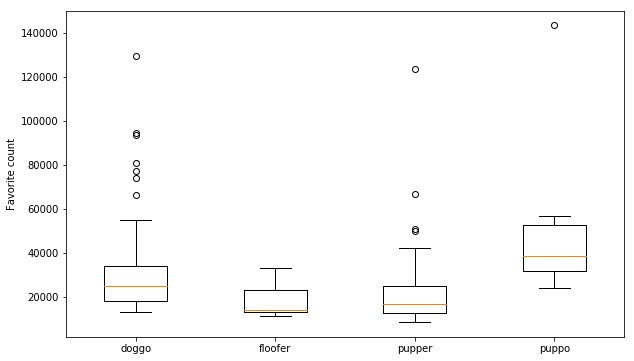

In [31]:
doggos = has_stage_archive[has_stage_archive['doggo'] == 1]
floofers = has_stage_archive[has_stage_archive['floofer'] == 1]
puppers = has_stage_archive[has_stage_archive['pupper'] == 1]
puppos = has_stage_archive[has_stage_archive['puppo'] == 1]
dog_data = doggos[doggos['favorite_count'] > np.percentile(doggos['favorite_count'],75)]['favorite_count']
floof_data = floofers[floofers['favorite_count'] > np.percentile(floofers['favorite_count'],75)]['favorite_count']
pupper_data = puppers[puppers['favorite_count'] > np.percentile(puppers['favorite_count'],75)]['favorite_count']
puppo_data = puppos[puppos['favorite_count'] > np.percentile(puppos['favorite_count'],75)]['favorite_count']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_ylabel('Favorite count')
plt.boxplot([dog_data,floof_data,pupper_data,puppo_data],labels=['doggo', 'floofer', 'pupper','puppo'])
plt.show()